In [2]:
using DecisionMakingProblems
using MCTS
using Statistics
using Plots
using LaTeXStrings
using BenchmarkTools

In [3]:
twenty_forty_eight = DecisionMakingProblems.TwentyFortyEight(γ=0.99)

mdp = DecisionMakingProblems.MDP(twenty_forty_eight)

MDP(0.99, nothing, (0x00, 0x01, 0x02, 0x03), nothing, DecisionMakingProblems.var"#27#29"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
), DecisionMakingProblems.var"#28#30"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
))

In [27]:
mdp.TR(DecisionMakingProblems.initial_board(), DecisionMakingProblems.RIGHT)

(0x0000100210000000, 4.0f0)

In [4]:
π_rand(s) = rand(DecisionMakingProblems.DIRECTIONS)

π_rand (generic function with 1 method)

In [5]:
rollouts_random = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), π_rand, 10000) for i in 1:100 ]

print("$(mean(rollouts_random)) ± $(std(rollouts_random))")

513.1371319314853 ± 167.27364369576966

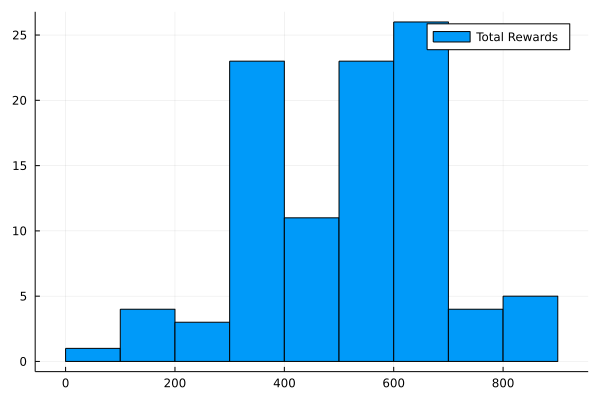

In [17]:
histogram(rollouts_random, label="Total Rewards")

In [8]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

board = DecisionMakingProblems.initial_board()

@benchmark MCTS.rollout(mdp, board, mcts_problem, 100)

BenchmarkTools.Trial: 45 samples with 1 evaluation.
 Range (min … max):   90.779 ms … 296.451 ms  ┊ GC (min … max): 0.00% …  1.66%
 Time  (median):     101.301 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   115.585 ms ±  46.370 ms  ┊ GC (mean ± σ):  9.39% ± 13.77%

  ▂█▂▂                                                           
  ████▅▅█▆▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▃▁▃ ▁
  90.8 ms          Histogram: frequency by time          296 ms <

 Memory estimate: 39.30 MiB, allocs estimate: 1496741.

In [9]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

rollouts_mcts_U0 = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 100) for i in 1:100 ]

print("$(mean(rollouts_mcts_U0)) ± $(std(rollouts_mcts_U0))")

707.2750171572152 ± 32.01554736307345

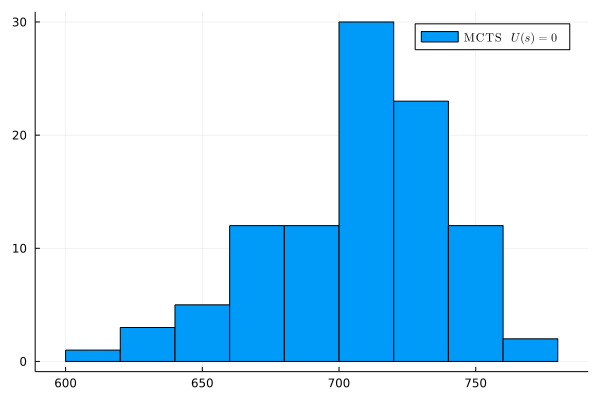

In [16]:
histogram(rollouts_mcts_U0, label=L"\mathrm{MCTS} \quad U(s) = 0")

In [11]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> MCTS.rollout(mdp, s, π_rand, 100) # U
)

rollouts_mcts_U = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 100) for i in 1:100 ]

print("$(mean(rollouts_mcts_U)) ± $(std(rollouts_mcts_U))")

163.32900644520134 ± 153.42529837801158

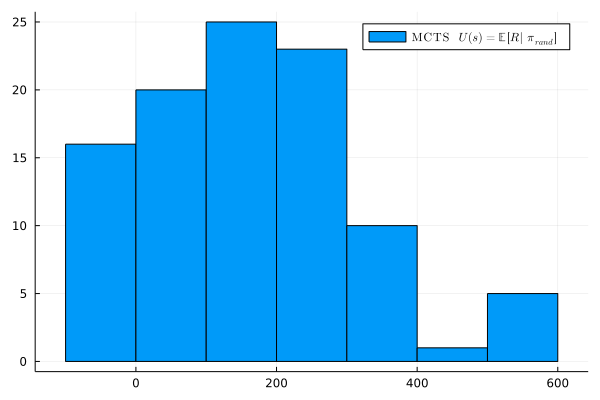

In [18]:
histogram(rollouts_mcts_U, label=L"\mathrm{MCTS} \quad U(s) = \mathbb{E}\,[R\,|\,\pi_{rand}]")

In [13]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

DecisionMakingProblems.play_game(s -> mcts_problem(s))

Move #1, current score=0.0
     0     0     0     0
     0     0     0     0
     2     0     0     0
     0     0     0     2

	a = DOWN
Move #2, current score=0.0
     0     0     0     0
     0     0     2     0
     0     0     0     0
     2     0     0     2

	a = RIGHT
Move #3, current score=4.0
     0     0     0     0
     0     0     2     2
     0     0     0     0
     0     0     0     4

	a = RIGHT
Move #4, current score=8.0
     0     2     0     0
     0     0     0     4
     0     0     0     0
     0     0     0     4

	a = UP
Move #5, current score=16.0
     0     2     0     8
     0     2     0     0
     0     0     0     0
     0     0     0     0

	a = UP
Move #6, current score=20.0
     0     4     2     8
     0     0     0     0
     0     0     0     0
     0     0     0     0

	a = LEFT
Move #7, current score=20.0
     4     2     8     0
     0     0     0     0
     0     0     0     0
     0     0     0     2

	a = LEFT
Move #8, current score=20.0
     

	a = DOWN
Move #72, current score=672.0
     0     0     0     8
     0     2     0    64
     0     4    64    16
     2     2     8     2

	a = RIGHT
Move #73, current score=676.0
     0     0     2     8
     0     0     2    64
     0     4    64    16
     0     4     8     2

	a = UP
Move #74, current score=688.0
     0     8     4     8
     0     2    64    64
     0     0     8    16
     0     0     0     2

	a = RIGHT
Move #75, current score=816.0
     0     8     4     8
     0     0     2   128
     0     0     8    16
     0     0     2     2

	a = RIGHT
Move #76, current score=820.0
     0     8     4     8
     0     0     2   128
     0     0     8    16
     0     0     4     4

	a = RIGHT
Move #77, current score=828.0
     0     8     4     8
     0     0     2   128
     0     4     8    16
     0     0     0     8

	a = DOWN
Move #78, current score=828.0
     2     0     0     8
     0     0     4   128
     0     8     2    16
     0     4     8     8

	a = RIGHT


     0    16     2     0

	a = DOWN
Move #187, current score=2556.0
     0     2     0     0
     0   128    16     0
     8   256     4     2
     4    16     4     0

	a = DOWN
Move #188, current score=2564.0
     2     2     0     0
     0   128     0     0
     8   256    16     0
     4    16     8     2

	a = UP
Move #189, current score=2564.0
     2     2    16     2
     8   128     8     0
     4   256     2     0
     0    16     0     0

	a = LEFT
Move #190, current score=2568.0
     4    16     2     0
     8   128     8     0
     4   256     2     0
    16     0     0     2

	a = DOWN
Move #191, current score=2568.0
     4     0     0     4
     8    16     2     0
     4   128     8     0
    16   256     2     2

	a = LEFT
Move #192, current score=2580.0
     8     0     4     0
     8    16     2     0
     4   128     8     0
    16   256     4     0

	a = DOWN
Move #193, current score=2596.0
     0     2     4     0
    16    16     2     0
     4   128     8     0
 

    16    64   512    16
     4    32     8     0

	a = RIGHT
Move #293, current score=4536.0
     0     0    16     2
     0     2     8     2
    16    64   512    16
     0     4    32     8

	a = UP
Move #294, current score=4540.0
    16     2    16     4
     0    64     8    16
     2     4   512     8
     0     0    32     0

	a = LEFT
Move #295, current score=4540.0
    16     2    16     4
    64     8    16     0
     2     4   512     8
    32     0     0     2

	a = DOWN
Move #296, current score=4572.0
    16     0     2     0
    64     2     0     4
     2     8    32     8
    32     4   512     2

	a = LEFT
Move #297, current score=4572.0
    16     2     0     0
    64     2     4     2
     2     8    32     8
    32     4   512     2

	a = UP
Move #298, current score=4576.0
    16     4     4     2
    64     8    32     8
     2     4   512     2
    32     0     0     2

	a = LEFT
Move #299, current score=4584.0
    16     8     2     0
    64     8    32     8
  

	a = LEFT
Move #383, current score=6096.0
    16     8     8     0
     8   256     4     0
   512    64     2     0
     4    16     0     2

	a = LEFT
Move #384, current score=6112.0
    16    16     0     0
     8   256     4     0
   512    64     2     0
     4    16     2     2

	a = LEFT
Move #385, current score=6148.0
    32     4     0     0
     8   256     4     0
   512    64     2     0
     4    16     4     0

	a = UP
Move #386, current score=6148.0
    32     4     4     0
     8   256     2     0
   512    64     4     2
     4    16     0     0

	a = LEFT
Move #387, current score=6156.0
    32     8     2     0
     8   256     2     0
   512    64     4     2
     4    16     0     0

	a = UP
Move #388, current score=6160.0
    32     8     4     2
     8   256     4     0
   512    64     0     0
     4    16     2     0

	a = UP
Move #389, current score=6168.0
    32     8     8     2
     8   256     2     0
   512    64     0     0
     4    16     0     2

	a = 

	a = DOWN
Move #447, current score=6904.0
     0     2     2     4
     2     8    32     8
   256     4   128   512
     2    16    64     8

	a = RIGHT
Move #448, current score=6908.0
     2     0     4     4
     2     8    32     8
   256     4   128   512
     2    16    64     8

	a = LEFT
Move #449, current score=6916.0
     2     8     0     4
     2     8    32     8
   256     4   128   512
     2    16    64     8

	a = DOWN
Move #450, current score=6936.0
     2     0     0     4
     4    16    32     8
   256     4   128   512
     2    16    64     8

	a = UP
Move #451, current score=6936.0
     2    16    32     4
     4     4   128     8
   256    16    64   512
     2     2     0     8

	a = RIGHT
Move #452, current score=6948.0
     2    16    32     4
     2     8   128     8
   256    16    64   512
     0     0     4     8

	a = DOWN
Move #453, current score=6952.0
     0     2    32     4
     0    16   128     8
     4     8    64   512
   256    16     4     8


	a = UP
Move #518, current score=9612.0
     8     8     2    32
     0     2    32    64
     0     0  1024     8
     2     0     2    32

	a = RIGHT
Move #519, current score=9632.0
     2    16     2    32
     0     2    32    64
     0     0  1024     8
     0     0     4    32

	a = DOWN
Move #520, current score=9632.0
     0     0     2    32
     0     2    32    64
     0    16  1024     8
     2     2     4    32

	a = LEFT
Move #521, current score=9636.0
     2    32     0     0
     2    32    64     0
    16  1024     8     2
     4     4    32     0

	a = UP
Move #522, current score=9704.0
     4    64    64     2
    16  1024     8     2
     4     4    32     0
     0     0     0     0

	a = RIGHT
Move #523, current score=9840.0
     0     4   128     2
    16  1024     8     2
     0     0     8    32
     2     0     0     0

	a = UP
Move #524, current score=9860.0
    16     4   128     4
     2  1024    16    32
     0     0     2     0
     0     0     0     0

	a 

	a = UP
Move #622, current score=11264.0
     4    64     4    32
     4    32   256  1024
     2     2    16     2
     0     0     4    16

	a = DOWN
Move #623, current score=11272.0
     2     0     4    32
     0    64   256  1024
     8    32    16     2
     2     2     4    16

	a = RIGHT
Move #624, current score=11276.0
     0     2     4    32
     2    64   256  1024
     8    32    16     2
     0     4     4    16

	a = RIGHT
Move #625, current score=11284.0
     2     2     4    32
     2    64   256  1024
     8    32    16     2
     0     0     8    16

	a = RIGHT
Move #626, current score=11288.0
     0     4     4    32
     2    64   256  1024
     8    32    16     2
     0     4     8    16

	a = LEFT
Move #627, current score=11296.0
     8    32     2     0
     2    64   256  1024
     8    32    16     2
     4     8    16     0

	a = UP
Move #628, current score=11328.0
     8    32     2  1024
     2    64   256     2
     8    32    32     2
     4     8     0 

	a = RIGHT
Move #706, current score=12748.0
     4     2    64     2
     2     4   256     8
     0    16  1024    16
     4   256     4     2

	a = DOWN
Move #707, current score=12748.0
     2     2    64     2
     4     4   256     8
     2    16  1024    16
     4   256     4     2

	a = RIGHT
Move #708, current score=12760.0
     0     4    64     2
     4     8   256     8
     2    16  1024    16
     4   256     4     2

	a = LEFT
Move #709, current score=12760.0
     4    64     2     2
     4     8   256     8
     2    16  1024    16
     4   256     4     2

	a = DOWN
Move #710, current score=12768.0
     2    64     2     2
     8     8   256     8
     2    16  1024    16
     4   256     4     2

	a = RIGHT
Move #711, current score=12788.0
     0     2    64     4
     2    16   256     8
     2    16  1024    16
     4   256     4     2

	a = UP
Move #712, current score=12824.0
     4     2    64     4
     4    32   256     8
     0   256  1024    16
     2     0     